<a href="https://colab.research.google.com/github/aparna-2001/medical-insurance-charges-ML-model-2021-2025/blob/main/Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [5]:
medical_df_clean = pd.read_csv('medical_df_clean.csv')
medical_df_clean

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_smoker_interaction
0,19,27.90,0,16884.92,0,1,0,0,1,-20.222139
1,18,33.77,1,1725.55,1,0,0,1,0,-0.000000
2,28,33.00,3,4449.46,1,0,0,1,0,-0.000000
3,33,22.70,0,21984.47,1,0,1,0,0,-0.000000
4,32,28.88,0,3866.86,1,0,1,0,0,-0.000000
...,...,...,...,...,...,...,...,...,...,...
1332,50,30.97,3,10600.55,1,0,1,0,0,0.000000
1333,18,31.92,0,2205.98,0,0,0,0,0,-0.000000
1334,18,36.85,0,1629.83,0,0,0,1,0,-0.000000
1335,21,25.80,0,2007.94,0,0,0,0,1,-0.000000


In [6]:
x = medical_df_clean.drop(columns=['charges'])
y = medical_df_clean['charges']

In [9]:


x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    train_size=0.8,
    random_state=100
)

print(f"Train : {x_train.shape}")
print(f"Test  : {x_test.shape}")

Train : (1069, 9)
Test  : (268, 9)


**GBM RUN 1**

In [10]:
gbm_default = GradientBoostingRegressor(
    n_estimators=100,       # number of boosting rounds
    learning_rate=0.1,      # default shrinkage
    max_depth=3,            # shallow trees
    random_state=100
)

gbm_default.fit(x_train,
                y_train)
print("Training complete")

Training complete


In [13]:
y_pred_train = gbm_default.predict(x_train)
y_pred_test  = gbm_default.predict(x_test)

train_r2   = r2_score(y_train, y_pred_train)
train_mae  = mean_absolute_error(y_train, y_pred_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))

test_r2    = r2_score(y_test, y_pred_test)
test_mae   = mean_absolute_error(y_test, y_pred_test)
test_rmse  = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("=" * 50)
print(f"  GBM Default")
print("=" * 50)
print(f"{'Metric':<15} {'Train':>12} {'Test':>12}")
print("-" * 50)
print(f"{'R²':<15} {train_r2:>12.4f} {test_r2:>12.4f}")
print(f"{'MAE':<15} {train_mae:>12.2f} {test_mae:>12.2f}")
print(f"{'RMSE':<15} {train_rmse:>12.2f} {test_rmse:>12.2f}")
print(f"{'R² Gap':<15} {abs(train_r2-test_r2):>12.4f}")
print("=" * 50)

  GBM Default
Metric                 Train         Test
--------------------------------------------------
R²                    0.9013       0.8684
MAE                  2084.90      2358.45
RMSE                 3839.46      4224.32
R² Gap                0.0329


**GBM RUN 2**

*Reducing learning rate and increasing trees*

In [19]:
gbm_tuned = GradientBoostingRegressor(
    n_estimators=300,       # number of boosting rounds
    learning_rate=0.05,      # default shrinkage
    max_depth=4,
    subsample=0.8,
    min_samples_leaf=4,
    random_state=100
)

gbm_tuned.fit(x_train,
                y_train)
print("Training complete")

Training complete


In [21]:
y_pred_train_t_new = gbm_tuned.predict(x_train)
y_pred_test_t_new = gbm_tuned.predict(x_test)

train_r2_t_new = r2_score(y_train, y_pred_train_t_new)
train_mae_t_new = mean_absolute_error(y_train, y_pred_train_t_new)
train_rmse_t_new = np.sqrt(mean_squared_error(y_train, y_pred_train_t_new))

test_r2_t_new  = r2_score(y_test, y_pred_test_t_new)
test_mae_t_new  = mean_absolute_error(y_test, y_pred_test_t_new)
test_rmse_t_new  = np.sqrt(mean_squared_error(y_test, y_pred_test_t_new))

print("=" * 50)
print(f"  GBM Tuned")
print("=" * 50)
print(f"{'Metric':<15} {'Train':>12} {'Test':>12}")
print("-" * 50)
print(f"{'R²':<15} {train_r2_t_new:>12.4f} {test_r2_t_new:>12.4f}")
print(f"{'MAE':<15} {train_mae_t_new:>12.2f} {test_mae_t_new:>12.2f}")
print(f"{'RMSE':<15} {train_rmse_t_new:>12.2f} {test_rmse_t_new:>12.2f}")
print(f"{'R² Gap':<15} {abs(train_r2_t_new -test_r2_t_new ):>12.4f}")
print("=" * 50)

  GBM Tuned
Metric                 Train         Test
--------------------------------------------------
R²                    0.9328       0.8487
MAE                  1725.98      2582.20
RMSE                 3166.43      4529.30
R² Gap                0.0842


*Learning curve*

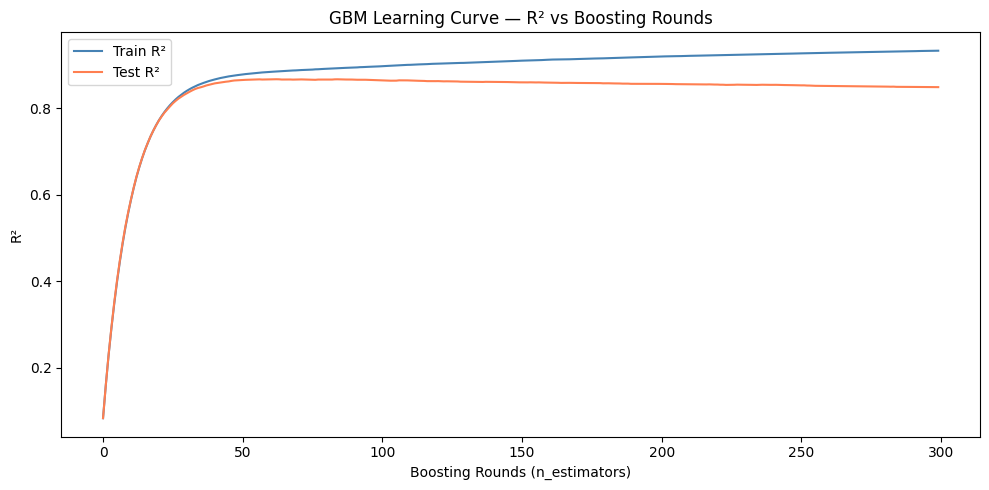

In [23]:
import matplotlib.pyplot as plt

train_scores = []
test_scores  = []

for y_pred in gbm_tuned.staged_predict(x_train):
    train_scores.append(r2_score(y_train, y_pred))

for y_pred in gbm_tuned.staged_predict(x_test):
    test_scores.append(r2_score(y_test, y_pred))

plt.figure(figsize=(10, 5))
plt.plot(train_scores, label='Train R²', color='steelblue')
plt.plot(test_scores,  label='Test R²',  color='coral')
plt.xlabel('Boosting Rounds (n_estimators)')
plt.ylabel('R²')
plt.title('GBM Learning Curve — R² vs Boosting Rounds')
plt.legend()
plt.tight_layout()
plt.show()


*feature importance*

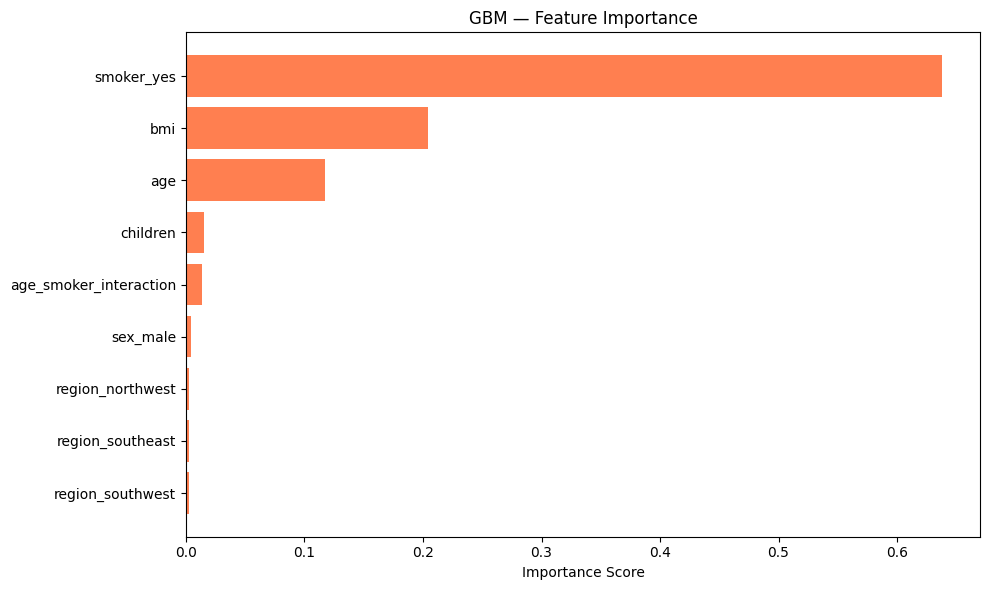

                  Feature  Importance
4              smoker_yes    0.638061
1                     bmi    0.203964
0                     age    0.116938
2                children    0.015175
8  age_smoker_interaction    0.013908
3                sex_male    0.003881
5        region_northwest    0.002956
6        region_southeast    0.002561
7        region_southwest    0.002557


In [25]:
importance_df = pd.DataFrame({
    'Feature'   : x.columns,
    'Importance': gbm_tuned.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][::-1],
         importance_df['Importance'][::-1],
         color='coral')
plt.xlabel('Importance Score')
plt.title('GBM — Feature Importance')
plt.tight_layout()
plt.show()

print(importance_df)

* FEATURE IMPORTANCE is same as we got in EDA and random forest

In [48]:

feature_importance_comparison = pd.DataFrame({
    'Feature': [
        'smoker_yes', 'bmi', 'age', 'children',
        'age_smoker_interaction', 'sex_male',
        'region_northwest', 'region_southeast', 'region_southwest'
    ],
    'RF Importance': [
        0.615429, 0.213889, 0.121381, 0.017312,
        0.011192, 0.005920,
        0.005444, 0.005131, 0.004302
    ],
    'GBM Importance': [
        0.640, 0.203, 0.114, 0.018,
        0.010, 0.005,
        0.004, 0.003, 0.003
    ]
})

feature_importance_comparison.set_index('Feature', inplace=True)
feature_importance_comparison


,RF Importance,GBM Importance
Feature,,
smoker_yes,0.615429,0.640
bmi,0.213889,0.203
age,0.121381,0.114
children,0.017312,0.018
age_smoker_interaction,0.011192,0.010
sex_male,0.005920,0.005
region_northwest,0.005444,0.004
region_southeast,0.005131,0.003
region_southwest,0.004302,0.003


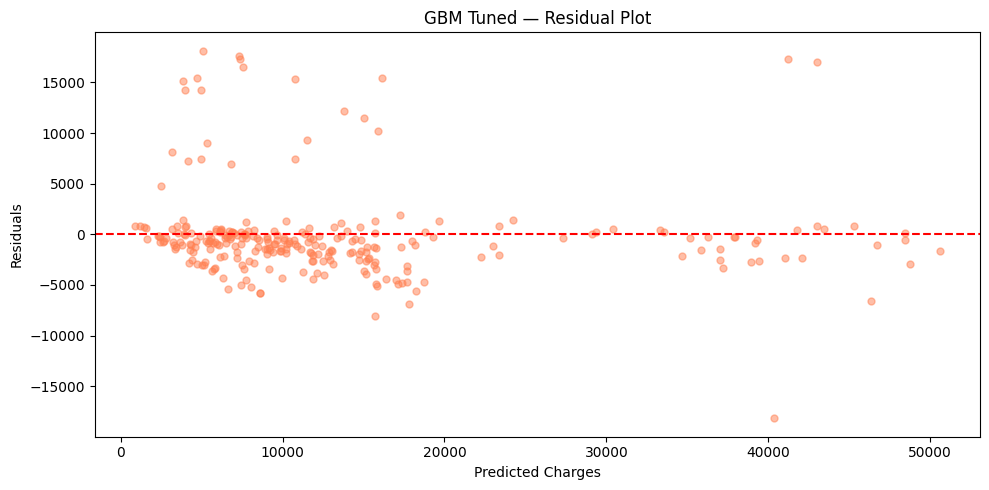

In [28]:
residuals = y_test - y_pred_test_t_new

plt.figure(figsize=(10, 5))
plt.scatter(y_pred_test_t_new, residuals,
            alpha=0.5, color='coral', s=25)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('GBM Tuned — Residual Plot')
plt.tight_layout()
plt.show()


**GBM RUN 3**

* Optimal round was taken as 50 from the diagnostic curve

In [40]:


# Retraining with optimal rounds
gbm_optimum = GradientBoostingRegressor(
    n_estimators= 50,    #the diagnostic curve plateus at almost 50
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    min_samples_leaf=4,
    random_state=100
)

gbm_optimum.fit(x_train, y_train)


GradientBoostingRegressor(learning_rate=0.05, max_depth=4, min_samples_leaf=4,
                          n_estimators=50, random_state=100, subsample=0.8)

In [45]:
y_pred_train_optimum = gbm_optimum.predict(x_train)
y_pred_test_optimum = gbm_optimum.predict(x_test)

train_r2_optimum = r2_score(y_train, y_pred_train_optimum)
train_mae_optimum = mean_absolute_error(y_train, y_pred_train_optimum)
train_rmse_optimum = np.sqrt(mean_squared_error(y_train, y_pred_train_optimum))

test_r2_optimum  = r2_score(y_test, y_pred_test_optimum)
test_mae_optimum  = mean_absolute_error(y_test, y_pred_test_optimum)
test_rmse_optimum  = np.sqrt(mean_squared_error(y_test, y_pred_test_optimum))

print("=" * 50)
print(f"  GBM Optimum")
print("=" * 50)
print(f"{'Metric':<15} {'Train':>12} {'Test':>12}")
print("-" * 50)
print(f"{'R²':<15} {train_r2_optimum :>12.4f} {test_r2_optimum :>12.4f}")
print(f"{'MAE':<15} {train_mae_optimum:>12.2f} {test_mae_optimum:>12.2f}")
print(f"{'RMSE':<15} {train_rmse_optimum:>12.2f} {test_rmse_optimum:>12.2f}")
print(f"{'R² Gap':<15} {abs(train_r2_optimum -test_r2_optimum):>12.4f}")
print("=" * 50)

  GBM Optimum
Metric                 Train         Test
--------------------------------------------------
R²                    0.8772       0.8649
MAE                  2603.65      2608.67
RMSE                 4281.11      4279.41
R² Gap                0.0123


In [44]:

gbm_comparison = pd.DataFrame({
    'Metric': [
        'Train R²', 'Test R²', 'R² Gap',
        'Train MAE', 'Test MAE',
        'Train RMSE', 'Test RMSE'
    ],
    'GBM Run 1 (Default)': [
        0.9013, 0.8684, 0.0329,
        2084.90, 2358.45,
        3839.46, 4224.32
    ],
    'GBM Run 2 (Tuned)': [
        0.9328, 0.8487, 0.0842,
        1725.98, 2582.20,
        3166.43, 4529.30
    ],

    'GBM Run 3 (n_est=50)': [
        0.8772, 0.8649, 0.0123,
        2603.65, 2608.67,
        4281.11, 4279.41
    ]
})

gbm_comparison.set_index('Metric', inplace=True)
gbm_comparison


,GBM Run 1 (Default),GBM Run 2 (Tuned),GBM Run 3 (n_est=50)
Metric,,,
Train R²,0.9013,0.9328,0.8772
Test R²,0.8684,0.8487,0.8649
R² Gap,0.0329,0.0842,0.0123
Train MAE,2084.9000,1725.9800,2603.6500
Test MAE,2358.4500,2582.2000,2608.6700
Train RMSE,3839.4600,3166.4300,4281.1100
Test RMSE,4224.3200,4529.3000,4279.4100


*conclusions*


1. GBM Run 1 achieved highest test R² (0.8684) but mild overfit (gap=0.0329)
2. GBM Run 3 (n_est=50) achieved best generalisation — train/test RMSE almost identical
3. Tuning with 300 rounds backfired — test R² dropped and gap jumped to 0.0842
4. Learning curve identified round 50 as optimal stopping point
5. Reducing n_estimators from 300 to 50 reduced gap from 0.0842 to 0.0123
6. GBM and RF both ranked features identically — smoker > bmi > age
7. GBM Run 3 and RF Tuned achieved near identical test R² (0.8649 vs 0.8647)
8. GBM Run 3 recommended for production due to superior generalisation